In [3]:
#Importing All Libary
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Dataset Read and Analysis

In [4]:
# read CSV file
df=pd.read_csv("https://raw.githubusercontent.com/BrijalKumar/Detecting-Breast-cancer-with-Random-forest/main/data.csv")

In [5]:
#print 10 sample data
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
135,868202,M,12.770,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.027040,0.1585,0.06065,0.2367,1.3800,1.457,19.870,0.007499,0.01202,0.023320,0.008920,0.01647,0.002629,14.490,33.37,92.04,653.6,0.14190,0.15230,0.21770,0.09331,0.2829,0.08067,NaN
225,88143502,B,14.340,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.046030,0.2075,0.05448,0.5220,0.8121,3.763,48.290,0.007089,0.01428,0.023600,0.012860,0.02266,0.001463,16.770,16.90,110.40,873.2,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072,NaN
496,914366,B,12.650,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.050740,0.1641,0.06854,0.2324,0.6332,1.696,18.400,0.005704,0.02502,0.026360,0.010320,0.01759,0.003563,14.380,22.15,95.29,633.7,0.15330,0.38420,0.35820,0.14070,0.3230,0.10330,NaN
319,894335,B,12.430,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.016990,0.1472,0.05561,0.3778,2.2000,2.487,31.160,0.007357,0.01079,0.009959,0.011200,0.03433,0.002961,12.900,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932,NaN
369,9012000,M,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.150100,0.1824,0.06140,1.0080,0.6999,7.561,130.200,0.003978,0.02821,0.035760,0.014710,0.01518,0.003796,27.660,25.80,195.00,2227.0,0.12940,0.38850,0.47560,0.24320,0.2741,0.08574,NaN
104,862989,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.012010,0.2217,0.06481,0.3550,1.5340,2.302,23.130,0.007595,0.02219,0.028800,0.008614,0.02710,0.003451,11.540,23.31,74.22,402.8,0.12190,0.14860,0.07987,0.03203,0.2826,0.07552,NaN
184,873885,M,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.032630,0.1727,0.06317,0.2054,0.4956,1.344,19.530,0.003290,0.01395,0.017740,0.006009,0.01172,0.002575,17.800,28.03,113.80,973.1,0.13010,0.32990,0.36300,0.12260,0.3175,0.09772,NaN
168,8712766,M,17.470,24.68,116.10,984.6,0.10490,0.16030,0.21590,0.104300,0.1538,0.06365,1.0880,1.4100,7.337,122.300,0.006174,0.03634,0.046440,0.015690,0.01145,0.005120,23.140,32.33,155.30,1660.0,0.13760,0.38300,0.48900,0.17210,0.2160,0.09300,NaN
59,858477,B,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,0.07187,0.1559,0.5796,1.046,8.322,0.010110,0.01055,0.019810,0.005742,0.02090,0.002788,9.507,15.40,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026,NaN
86,86135501,M,14.480,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.049380,0.2075,0.05636,0.4204,2.2200,3.301,38.870,0.009369,0.02983,0.053710,0.017610,0.02418,0.003249,16.210,29.25,108.40,808.9,0.13060,0.19760,0.33490,0.12250,0.3020,0.06846,NaN


In [6]:
# Check all data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Remove Id colunm
df.drop(columns=['id','Unnamed: 32'],axis=1,inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
# Diagnosis is our targeted column
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

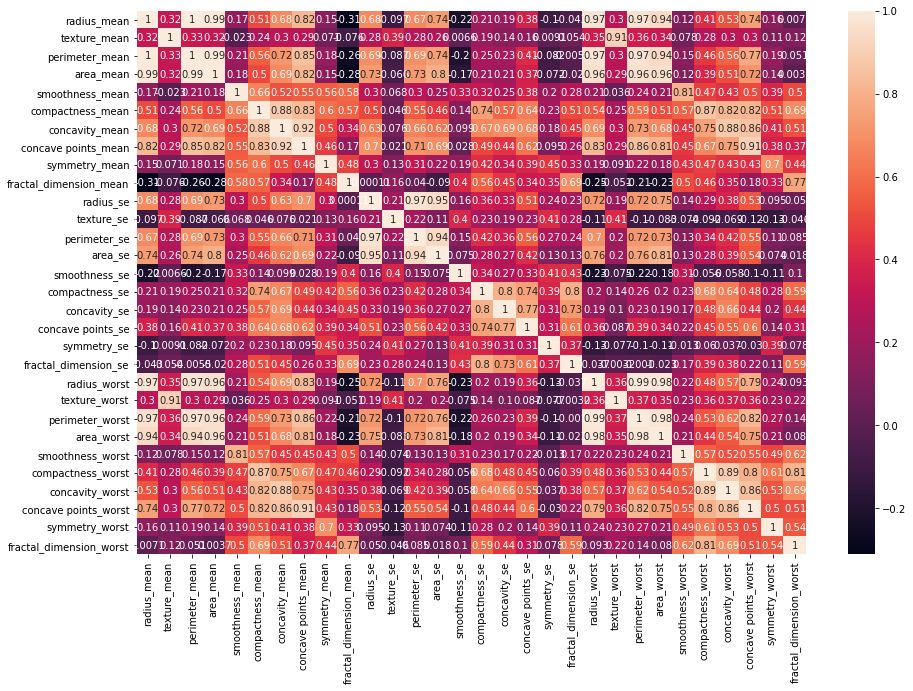

In [9]:
#Plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Data Preprossing

In [10]:
le=LabelEncoder()
Y=le.fit_transform(df['diagnosis'])
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [11]:
X=df.drop(columns=['diagnosis'],axis=1)

In [12]:
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [13]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Split train and test data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test

In [15]:
X_train

array([[ 0.02633046,  0.8913485 ,  0.0988963 , ...,  0.95309024,
         3.66466829,  3.36120112],
       [ 2.15359679, -0.4746399 ,  2.01547631, ...,  1.02617791,
        -0.63215701, -1.0532229 ],
       [-0.1809999 ,  0.700529  , -0.2083826 , ...,  0.20698697,
        -0.04813821, -0.81881399],
       ...,
       [-0.11851678,  0.35845013, -0.07286684, ...,  0.62419573,
         0.47764049,  1.72643451],
       [ 0.37850807, -1.72194788,  0.43377262, ...,  1.03683652,
         0.5099961 ,  0.94507148],
       [ 0.09733401,  1.32651006,  0.15821018, ...,  0.08974217,
         0.46308046,  1.01711204]])

# Creating Random Forest Model

In [16]:
model=RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
y_pred=model.predict(X_test)


In [18]:
accuracy_score(y_test,y_pred)


0.9532163742690059

# Final Result

In [19]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       106
           1       0.95      0.92      0.94        65

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, model.predict(X_train), normalize='true')

array([[1.        , 0.        ],
       [0.00680272, 0.99319728]])

In [21]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 99.75%


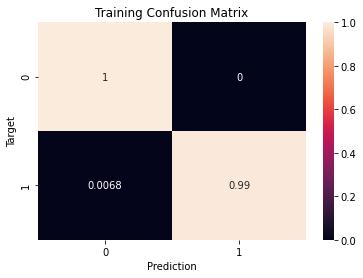

In [22]:
train_preds = predict_and_plot(X_train, y_train, 'Training')

Accuracy: 95.32%


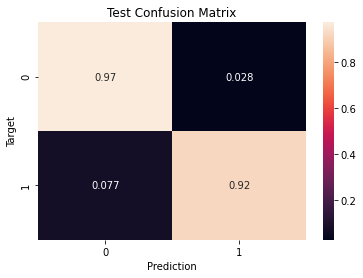

In [23]:
val_preds = predict_and_plot(X_test, y_test, 'Test')

We got 95% Accuracy!